# Lab 4

## General principles of machine learning and the validity of a primitive conformal predictor

### 1. Nearest Neighbours Regression and an inverted U-shape

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

In [2]:
 print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

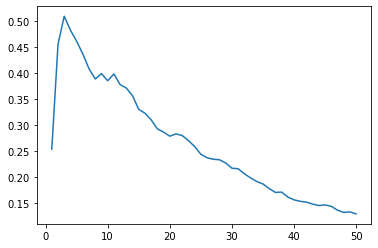

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston['data'],
  boston['target'], random_state=0)
from sklearn.neighbors import KNeighborsRegressor
K_max = 50  # maximal number of nearest neighbours to consider
import numpy as np
results = np.empty(K_max)
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(K_max)+1,results)

In [4]:
help(KNeighborsRegressor.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Return the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a
        precomputed kernel matrix or a list of generic objects instead,
        shape = (n_samples, n_samples_fitted),
        where n_samples_fitted is the number of
        samples used in the fitting for the estimator.
    
    y : array-like of shape (n

### 2. Using cross-validation to get an inverted U-shaped curve

In [5]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=1)
cross_val_score(knn, X_train, y_train)

array([0.41743153, 0.17741167, 0.01938625, 0.427455  , 0.25685911])

In [6]:
from sklearn.utils import shuffle
# print(cross_val_score(knn, boston.data, boston.target))
X, y = shuffle(boston.data, boston.target, random_state=0)
print(cross_val_score(knn, X, y))

[0.27367598 0.27668466 0.48155521 0.45730902 0.67114389]


In [7]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.2540875231617269

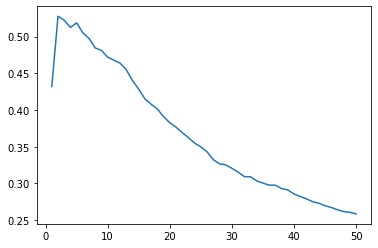

In [8]:
K_max = 50  # maximal number of nearest neighbours to consider
results = np.empty(K_max)
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    results[k] = np.mean(cross_val_score(knn, X, y))
plt.plot(np.arange(K_max)+1,results)

#### Exercise 1: 

Explain the role of np.mean in the previous code cell.

Answer:  cross_val_score outputs an array, and to get the overall accuracy we need to average it.

#### Exercise 2:  

Try different values of K_max.

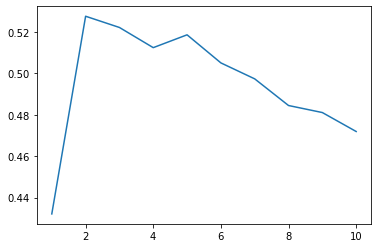

In [9]:
K_max = 10  # maximal number of nearest neighbours to consider
results = np.empty(K_max)
for k in range(K_max):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    results[k] = np.mean(cross_val_score(knn, X, y))
plt.plot(np.arange(K_max)+1,results)

We can see that the optimal value of K is 5 for cross validation.  If you modify the code not using cross validation by replacing 50 with 10, you will see that the optimal K is 3.  If you replace K by 150 or 200, you will see that the curve that you obtain for cross-validation is more regular.

### 3. Learning curves

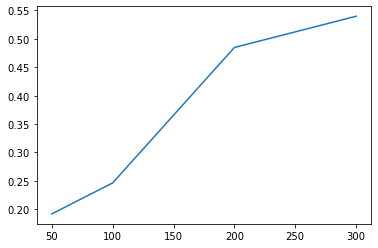

In [10]:
knn = KNeighborsRegressor(n_neighbors=3)
train_sizes = np.array([50,100,200,300]) # sizes of training sets
                                         # that we will try
results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(boston.data,
    boston.target, train_size=train_sizes[k], random_state=0)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes,results)

#### Exercise 3: 

Try other arrays of train_sizes. Write one sentence summarizing what you see.

##### Answer: 

Any serious answer is accepted (even "I do not see anything unusual"). For me, it was striking to see how unstable the learning curve was; for example, for a denser grid of training sizes it was not monotonic.

#### Exercise 4: 

- What is the size of the test set that you obtain when using train_test_split if you only specify the parameter train_size and do not specify test_size?  
- What happens if you only specify test_size and do not specify train_size?  
- Can you specify both?   
- To make sure your answers are correct you should use the scikit-learn documentation.

This is from the documentation:

- test_size : float or int, default=None
  - If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.
-  train_size : float or int, default=None
  - If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

Yes, you can specify both (but make sure that the sum of train_size and test_size does not exceed the size of the dataset).

### 4. Value at Risk (optional)

In [11]:
n = 99    # we are in the morning of the 100th day
L = 10**6 * np.random.random((n)) - 10**6/2
print(L)

[ -28563.26857681  353870.23571003  -66438.38400571  306022.63559901
  183102.9897611  -412612.57702235  251885.4582394  -408493.59774491
 -262663.42985845  363593.08352589 -432183.37759487  329650.6890414
  -72003.70214032  381127.28878384 -208041.6150758   423369.27177524
  157534.29387042  293352.97775895   89151.83159465   67615.11307025
  294428.95352862 -453532.33834302  148520.81941148  227933.55372414
  317686.53074152   54968.95102523 -225032.5798578    30854.25563777
 -442240.16900778  -32978.21736103  489405.13725342  390702.79082411
  411427.67303632  125981.2660627   -96444.19590922 -295143.74919401
  -30539.83345737  108634.24915226  365552.18848383  472866.23228319
  226532.37209855 -344990.41238157 -460783.33508881  322492.00464393
  -80037.60335312  286108.3127153   409708.69653193  -23156.5779446
 -392614.8301171  -259846.24331231 -453452.76756577 -274938.32806773
   -6881.56663143  185131.15502415  302118.87701184 -410136.80886733
 -178435.75166897 -170821.81288442  

Let's see what the sorted L looks like.

In [12]:
np.sort(L)

array([-474558.55036435, -460783.33508881, -453532.33834302,
       -453452.76756577, -442240.16900778, -432183.37759487,
       -431800.74975467, -426166.73038619, -412612.57702235,
       -410136.80886733, -408493.59774491, -392614.8301171 ,
       -392127.96093503, -386993.89092484, -367546.81023175,
       -363953.20416357, -362969.39986564, -344990.41238157,
       -295143.74919401, -274938.32806773, -267188.88823673,
       -262663.42985845, -259846.24331231, -243579.07322079,
       -225032.5798578 , -212150.8325802 , -208041.6150758 ,
       -205688.12458294, -200862.55279278, -178435.75166897,
       -170821.81288442, -162505.87034672, -136967.11432773,
       -136709.89646866, -109244.72162251,  -96444.19590922,
        -86065.69518246,  -80037.60335312,  -72003.70214032,
        -66438.38400571,  -54057.17143125,  -32978.21736103,
        -30539.83345737,  -28563.26857681,  -23156.5779446 ,
         -6881.56663143,   -6154.27712393,    2583.56757064,
         30854.25563777,

In [13]:
sorted_L = np.sort(L)
VaR = sorted_L[-int(np.floor((n+1)/5))]
print(VaR)

322492.00464393


In [14]:
np.floor(4.5)

4.0

In [15]:
import math
def VaR(L):
    """Value at Risk (a primitive conformal predictor)"""
    if L.size>=4:
        return np.sort(L)[-int(np.floor((n+1)/5))]
    else:
        return math.inf

### Validity of conformal prediction: an empirical test

In [16]:
N = 500    # the number of days
# The losses on those days:
L = 10**6 * np.random.random_sample((N)) - 10**6/2

In [17]:
successes = np.empty(N)
for n in range(N):
    # This is what happens on the (n+1)st day:
    V = VaR(L[:n])  # VaR for the (n+1)st day
    if L[n]<=V:
        successes[n] = 1  # our VaR worked
    else:
        successes[n] = 0  # it didn't
print(np.mean(successes))

0.782


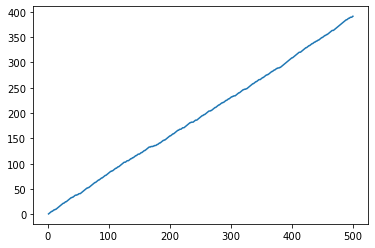

In [18]:
plt.plot(np.arange(N)+1,np.cumsum(successes))

#### Exercise:  
- What is the function np.cumsum doing?

#### Answer:  
The nth element of cumsum(s) is the sum of the first n elements of s.

## 5. One more exercise

#### Exercise 6. 
- Plot a learning curve for the iris dataset

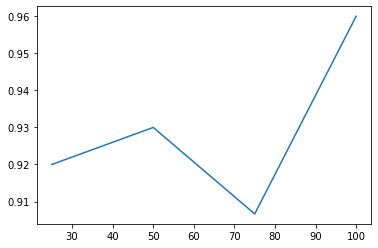

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
from sklearn.datasets import load_iris
iris = load_iris()
train_sizes = np.array([25,50,75,100]) # sizes of training sets
                                       # that we will try
results = np.empty(train_sizes.size)
for k in range(train_sizes.size):
    X_train, X_test, y_train, y_test = train_test_split(iris.data,
    iris.target, train_size=train_sizes[k], test_size=None, random_state=0)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_test, y_test)
plt.plot(train_sizes,results)